# Stars, Galaxies and Quasars Classification And Analysis

In [1]:
#importing all Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import time



import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)

SMALL_SIZE = 10
MEDIUM_SIZE = 12

plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', titlesize=MEDIUM_SIZE)
plt.rc('axes', labelsize=MEDIUM_SIZE)
plt.rcParams['figure.dpi']=150

Feature Description
* objid = Object Identifier
* ra = J2000 Right Ascension (r-band)
* dec = J2000 Declination (r-band)
* u = better of DeV/Exp magnitude fit
* g = better of DeV/Exp magnitude fit
* r = better of DeV/Exp magnitude fit
* i = better of DeV/Exp magnitude fit
* z = better of DeV/Exp magnitude fit
* run = Run Number
* rereun = Rerun Number
* camcol = Camera column
* field = Field number
* specobjid = Object Identifier
* class = object class (galaxy, star or quasar object)
* redshift = Final Redshift
* plate = plate number
* mjd = MJD of observation
* fiberid = fiber ID

In [2]:
# import data from path
df = pd.read_csv(r"C:\Users\hp\Desktop\New folder\Python Object and Data Structure Basics\csv file\All Files\All Files\Stars Galaxies and Quasars Classification.csv")
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.240000e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.720000e+18,STAR,-0.000009,3306,54922,491
1,1.240000e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.640000e+17,STAR,-0.000055,323,51615,541
2,1.240000e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.230000e+17,GALAXY,0.123111,287,52023,513
3,1.240000e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.720000e+18,STAR,-0.000111,3306,54922,510
4,1.240000e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.720000e+18,STAR,0.000590,3306,54922,512


In [3]:
df.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

In [4]:
df.dtypes

objid        float64
ra           float64
dec          float64
u            float64
g            float64
r            float64
i            float64
z            float64
run            int64
rerun          int64
camcol         int64
field          int64
specobjid    float64
class         object
redshift     float64
plate          int64
mjd            int64
fiberid        int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


In [6]:
df.shape

(10000, 18)

In [7]:
df.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.240000e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.644890e+18,0.143726,1460.986400,52943.533300,353.069400
std,2.122346e+05,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013758e+18,0.388774,1788.778371,1511.150651,206.298149
min,1.240000e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,3.000000e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.240000e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.390000e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.240000e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.970000e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.240000e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.880000e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.240000e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.470000e+18,5.353854,8410.000000,57481.000000,1000.000000


In [8]:
df['camcol'].value_counts()

4    1834
5    1827
6    1769
2    1712
3    1560
1    1298
Name: camcol, dtype: int64

<AxesSubplot:xlabel='camcol', ylabel='count'>

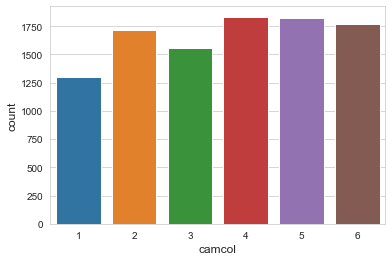

In [9]:
sns.countplot(x= df['camcol'])

<AxesSubplot:xlabel='camcol', ylabel='count'>

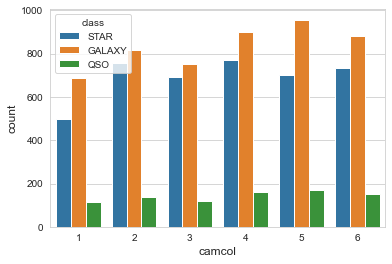

In [10]:
sns.countplot(x= df['camcol'], hue= df['class'])

In [11]:
#check Class column
df['class'].value_counts()

GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64

* Observation : 
* From above information we can find more than 50% are Galaxy followed by Star (40%) and remaining QSO(Quasars) 10%

In [12]:
# here we can drop unnecessary columns like objid, spacobjid, run, rerun, camcol, field.
# these all columns related to cameras and Id's
df.drop(['objid', 'specobjid', 'run', 'rerun', 'camcol', 'field'], axis=1, inplace= True)
df.head()

,ra,dec,u,g,r,i,z,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,STAR,-0.000009,3306,54922,491
1,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,STAR,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,GALAXY,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,STAR,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,STAR,0.000590,3306,54922,512


<AxesSubplot:xlabel='class', ylabel='count'>

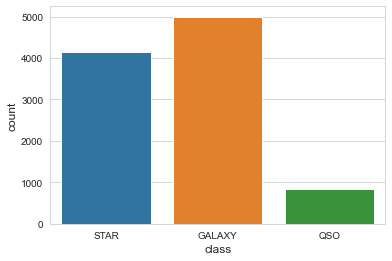

In [13]:
sns.countplot(x= df['class'])

# Univariate Analysis

C:\Users\hp\Documents\Python Scripts\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Quasars')

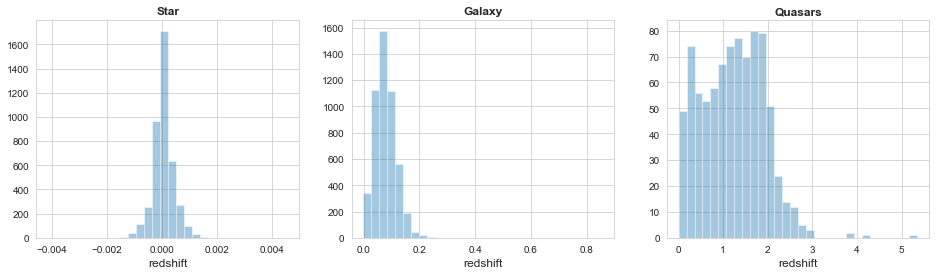

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize= (16,4))
ax = sns.distplot(df[df['class']== 'STAR'].redshift, bins= 30, ax = axes[0], kde= False)
ax.set_title('Star', fontweight= 'bold')
ax = sns.distplot(df[df['class']== 'GALAXY'].redshift, bins = 30, ax = axes[1], kde= False)
ax.set_title('Galaxy', fontweight= 'bold')
ax = sns.distplot(df[df['class']== 'QSO'].redshift, bins =30, ax= axes[2], kde= False)
ax.set_title('Quasars', fontweight= 'bold')

* Observation :
* From above chart we can clearly see :
    * Star    : It have Normal Distribution which occures in centered.
    * Galaxy  : Taking about Galaxy it clearly shows Right side shifted which occures 0 to 0.20.
    * Quasars : It shows Uniformaly Distributed compared to other both graph (Star and Galaxy) which occures from 0 to 3 and
                some outliers.

Text(0.5, 1.0, 'dec')

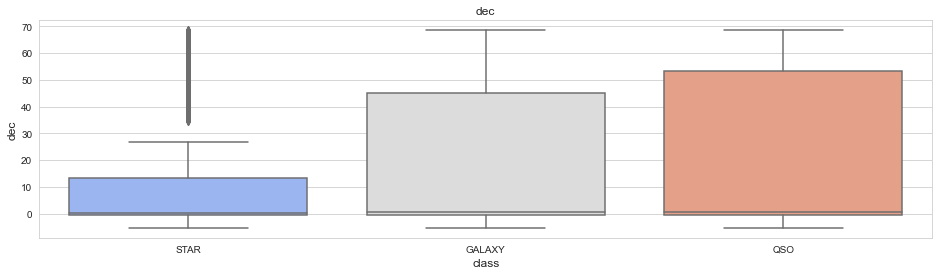

In [15]:
fig, axes = plt.subplots(nrows =1, ncols= 1, figsize= (16,4))
ax = sns.boxplot(x=df['class'], y=df['dec'], palette='coolwarm')
ax.set_title('dec')

* U" stands for ultraviolet. "G" stands for green. "R" stands for red. "I" stands for infrared.

Text(0.5, 1.0, 'Quasars')

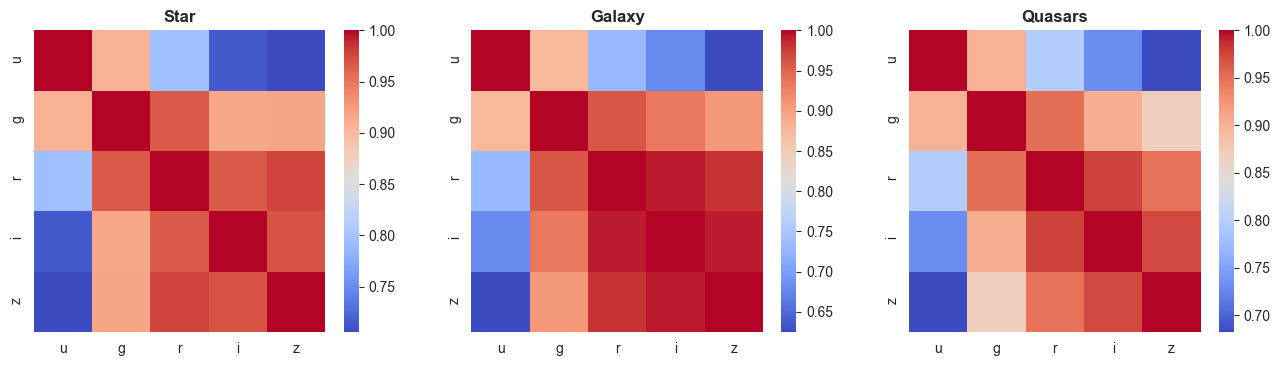

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(16,4))
fig.set_dpi(100)
ax = sns.heatmap(df[df['class']== 'STAR'][['u', 'g', 'r', 'i', 'z']].corr(), ax=axes[0], cmap='coolwarm')
ax.set_title('Star', fontweight= 'bold')
ax = sns.heatmap(df[df['class']=='GALAXY'][['u', 'g', 'r', 'i', 'z']].corr(), ax = axes[1], cmap= 'coolwarm')
ax.set_title('Galaxy', fontweight= 'bold')
ax = sns.heatmap(df[df['class']== 'QSO'][['u', 'g', 'r', 'i', 'z']].corr(), ax= axes[2], cmap= 'coolwarm')
ax.set_title('Quasars', fontweight= 'bold')

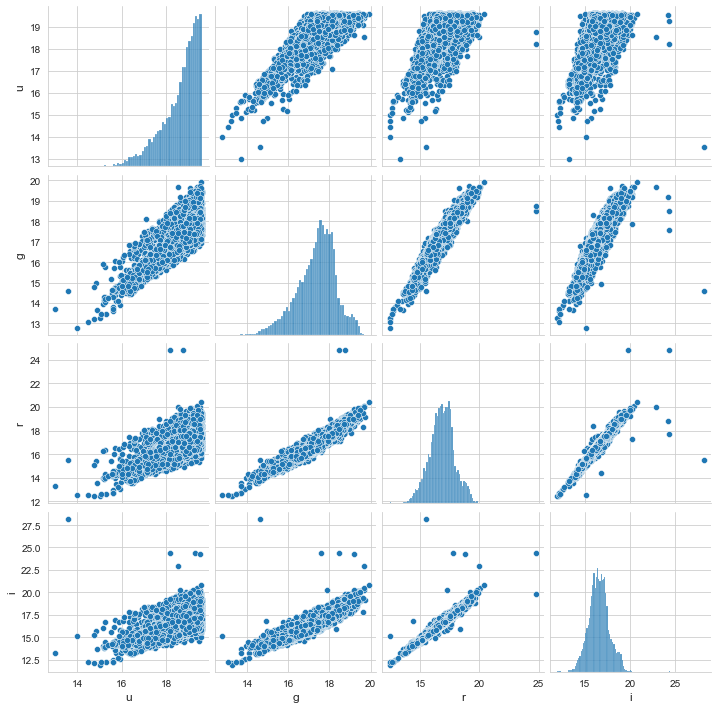

In [17]:
sns.pairplot(df[['u', 'g', 'r', 'i', 'class']])

* Observation :
    As we can see Column u is less correlated to other features.

C:\Users\hp\Documents\Python Scripts\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Equatorial Coordinates')

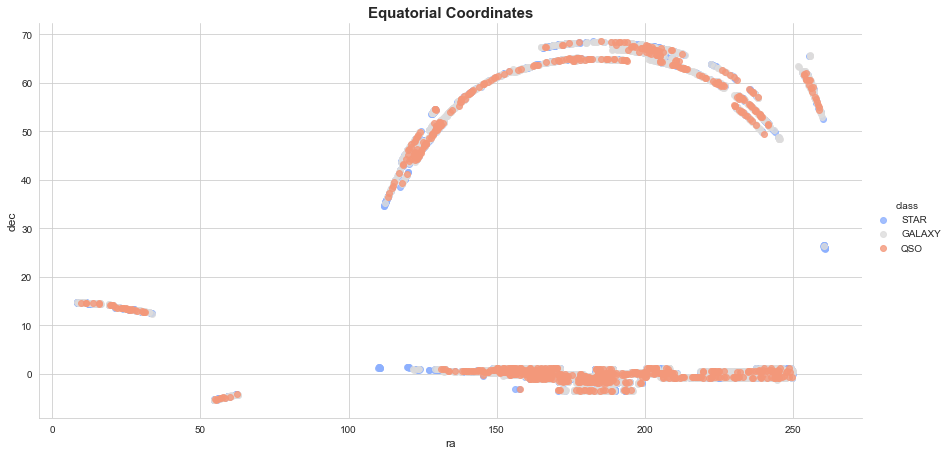

In [18]:
sns.lmplot(x= 'ra', y= 'dec', data=df, hue = 'class', fit_reg = False, palette= 'coolwarm', size=6, aspect= 2)
plt.title('Equatorial Coordinates', fontsize= 15, fontweight= 'bold')

# Principal Component Ananlysis

Using PCA on our data the amount of operation will reduce while doing training and testing.

In [21]:
df_fe = df

le = LabelEncoder()
y_encoded = le.fit_transform(df_fe['class'])#label encoded on class column
df['class'] = y_encoded

pca = PCA(n_components=3)
ugriz = pca.fit_transform(df_fe[['u', 'g', 'r', 'i', 'z']])

df_fe = pd.concat((df_fe, pd.DataFrame(ugriz)), axis= 1)

df_fe.rename({0: 'PCA_1', 1: 'PCA_2', 2: 'PCA_3'}, axis= 1, inplace= True)
df_fe.drop(['u', 'g', 'r', 'i', 'z'], axis= 1, inplace= True)
df_fe.head()

,ra,dec,class,redshift,plate,mjd,fiberid,PCA_1,PCA_2,PCA_3
0,183.531326,0.089693,2,-0.000009,3306,54922,491,-1.507202,-1.377293,-0.265119
1,183.598370,0.135285,2,-0.000055,323,51615,541,-0.195758,-0.028410,-0.155695
2,183.680207,0.126185,0,0.123111,287,52023,513,1.297604,-0.590023,0.140338
3,183.870529,0.049911,2,-0.000111,3306,54922,510,-1.446117,0.566685,-0.009272
4,183.883288,0.102557,2,0.000590,3306,54922,512,-0.849271,1.287505,-0.397689


In [22]:
scaler = MinMaxScaler()
sd = scaler.fit_transform(df_fe.drop('class', axis=1))

In [23]:
sd

array([[6.93832273e-01, 7.40254729e-02, 7.70273543e-04, ...,
        3.85886269e-01, 6.93479470e-02, 3.87685349e-01],
       [6.94097640e-01, 7.46422070e-02, 7.61699432e-04, ...,
        4.48109611e-01, 2.15263802e-01, 4.15556484e-01],
       [6.94421555e-01, 7.45191099e-02, 2.37490694e-02, ...,
        5.18964263e-01, 1.54511150e-01, 4.90959246e-01],
       ...,
       [4.88097418e-01, 7.71724013e-01, 6.96997371e-04, ...,
        5.27652687e-01, 2.60386724e-01, 4.22955603e-01],
       [4.87798936e-01, 7.72888457e-01, 3.38840082e-03, ...,
        5.23447184e-01, 2.30994024e-01, 4.65101058e-01],
       [4.88542500e-01, 7.73595116e-01, 2.28730132e-02, ...,
        4.12978041e-01, 9.79147122e-02, 4.54925954e-01]])

In [27]:
X_train, X_test, y_train, y_test = train_test_split(sd, df_fe['class'], test_size=0.33 )

# KNN algorithm

In [35]:
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

preds = knn.predict(X_test)

acc_knn = (preds == y_test).sum().astype(float) / len(preds)*100

print("Knearest Neighbors Classifier prediction accuracy :", (acc_knn))

Knearest Neighbors Classifier prediction accuracy : 92.81818181818183


# Naive Bayes

In [36]:
from sklearn.preprocessing import MaxAbsScaler
scaler_gnb = MaxAbsScaler()
sd = scaler_gnb.fit_transform(df_fe.drop('class', axis=1))
X_train_gnb, X_test_gnb, y_train_gnb, y_test_gnb = train_test_split(sd, df_fe['class'], test_size= 0.33)


gnb = GaussianNB()
gnb.fit(X_train_gnb, y_train_gnb)
preds = gnb.predict(X_test_gnb)
acc_gnb = (preds == y_test_gnb).sum().astype(float) / len(preds)*100

print("Gaussian Naive Bayes Classifier's prediction accuracy is :", (acc_gnb))

Gaussian Naive Bayes Classifier's prediction accuracy is : 97.3030303030303


# XG Boost

In [37]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
preds = xgb.predict(X_test)
acc_xgb = (preds == y_test).sum().astype(float) / len(preds)*100

print("XGBoost's prediction accuracy is: ", (acc_xgb))

C:\Users\hp\Documents\Python Scripts\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:33:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost's prediction accuracy is:  99.45454545454545


# Random Forest Classifier

In [38]:
rcf = RandomForestClassifier()
rcf.fit(X_train, y_train)
preds = rcf.predict(X_test)
acc_rcf = (preds == y_test).sum().astype(float) / len(preds)*100

print("Random Forest Classifier's prediction accuracy is: ", (acc_rcf))

Random Forest Classifier's prediction accuracy is:  99.27272727272727


# Support Vector Machine Classifier

In [39]:
svc = SVC()
svc.fit(X_train, y_train)
preds = svc.predict(X_test)
acc_svc = (preds == y_test).sum().astype(float) / len(preds)*100

print("Support Vector Machine Classifier prediction accuracy is :", (acc_svc))

Support Vector Machine Classifier prediction accuracy is : 95.21212121212122


# Comparison

In [41]:
results = pd.DataFrame({
    'Model' : ['KNN', 'Naive Bayes',
              'XGBoost', 'Random Forest', 'SVC'],
    'Score' : [acc_knn, acc_gnb, acc_xgb, acc_rcf, acc_svc]
    
})

result_df = results.sort_values(by = 'Score', ascending = False)
result_df = result_df.set_index('Model')
result_df

,Score
Model,
XGBoost,99.454545
Random Forest,99.272727
Naive Bayes,97.303030
SVC,95.212121
KNN,92.818182


# Conclusion:
    * Here we can see XGBoost, Random Forest and Naive Bayes have very good accuracy as compared to SVC and KNN.